## Data Cleaning

In the first portion, we will load our dataset with the pairs of quora questions. We will validate the datatypes and check for missing values.

In [1]:
# import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Get directory for data
path="/Users/student/Desktop/SpringBoardDSCareerTrack/Capstone 3 Datasets/Quora Semantic Pairing"
os.chdir(path)

In [3]:
# Assign data as a dataframe. Obtain the relevant features for analysis
quora_df = pd.read_csv('q_quora.csv')
quora_df = quora_df[['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']]
quora_df.set_index('id', inplace=True)
quora_df.head()

/Users/student/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# Check the datatype and non-null count
quora_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404351 entries, 0 to 404350
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404351 non-null  int64 
 1   qid2          404351 non-null  int64 
 2   question1     404350 non-null  object
 3   question2     404349 non-null  object
 4   is_duplicate  404351 non-null  object
dtypes: int64(2), object(3)
memory usage: 18.5+ MB


We notice two things. First, the non-null counts do not match meaning we must deal with missing values for question1 and question2. Next, the 'is_duplicate' feature should have a Dtype of int since it should be binary, 0 and 1. We address both issues.  

#### Missing Values

In [5]:
# Check the rows where missing values exist
quora_df[quora_df.isna().any(axis=1)]

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
105796,209841,209842,How can I develop android app?,NaN,0
201871,398348,398349,How can I create an Android app?,NaN,0
363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [6]:
# Remove rows with missing value
quora_df.dropna(axis=0, inplace=True)

#### Editing the 'is_duplicate' feature

We should expect the 'is_duplicate' column to be binary between 0 and 1. The dtype however is object so there is likely some string. We will now edit this column.

In [7]:
# Explore the unique values for 'is_duplicate' 
quora_df['is_duplicate'].unique()

array(['0', '1',
       'Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?',
       'My sister told my crush that I like her without me asking her to do so. What should I do now?',
       ' how would this change the plot for the whole RR story?',
       'What were the greatest achievements of the Persian Empire?',
       'What are the best places to visit in Japan to get a feel for their latest technological advancements?',
       'My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?',
       ' mass communication or pharmacy?',
       'What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?',
       "I am in love with my classmate, I am gay and he's straight, what should I do?",
       'Does Donald Trump get to deduct his campaign expenses from his taxes?',
       ' 2) share bonanza

There are many text values in the 'is_duplicate' column. We filter our dataset to only the rows where 'is_duplicate' is 0 or 1.

In [8]:
# Obtain the datasets with 0,1 values for is_duplicate, change datatype to int
quora_df = quora_df[(quora_df['is_duplicate'] == str(0)) | (quora_df['is_duplicate'] == str(1))]
print('Unique values of is_duplicate',quora_df['is_duplicate'].unique())
quora_df['is_duplicate'] = quora_df['is_duplicate'].astype(int)

Unique values of is_duplicate ['0' '1']


#### Unique value counts and feature type validation

In [9]:
# Check the unique count for each feature
for col in list(quora_df.columns):
    print('The unique value count for', col, 'is', quora_df[col].value_counts())
    print('\n')

The unique value count for qid1 is 7863      29
2628      19
196396    15
205101    12
26304     11
          ..
737230     1
735183     1
774096     1
253906     1
524288     1
Name: qid1, Length: 398998, dtype: int64


The unique value count for qid2 is 65333     47
147324    39
7863      18
3066      16
173838    16
          ..
317235     1
296761     1
302906     1
300859     1
771862     1
Name: qid2, Length: 397610, dtype: int64


The unique value count for question1 is How do I improve my English speaking?                                                         50
How does the ban on 500 and 1000 rupee notes helps to identify black money and corruption?    48
How do I improve my English language?                                                         47
What should I do to earn money online?                                                        47
How can changing 500 and 1000 rupee notes end the black money in India?                       47
                                 

In [10]:
# Ensure that 'is_duplicate' is of type int and there are no missing values.
quora_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404012 entries, 0 to 404350
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404012 non-null  int64 
 1   qid2          404012 non-null  int64 
 2   question1     404012 non-null  object
 3   question2     404012 non-null  object
 4   is_duplicate  404012 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


## Exploratory Analysis and Preprocessing

We will partition our data into two sets, one group where the pairs of questions have the same semantic meaning ('is_duplicate' = 1) and another group where the pairs do not have the same meaning ('is_duplicate' = 0). Some analysis we can do is use bag of words and tfidf modules to see the most common words between sentences. 

In [11]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')
# nltk.download('punkt')

In [12]:
### This function will take the questions and output a Counter object of the lemmatized 
### text, or the most important words of the question text in its root form.

def lemmatized_bagof_words(df):
    question1_bow = []; question2_bow = []
    index_list = list(df.index)
    english_stops = set(stopwords.words('english'))  

    for i in range(len(df)):
        # tokenize the words for each question
        tokens_1 = word_tokenize(df['question1'][index_list[i]])
        tokens_2 = word_tokenize(df['question2'][index_list[i]])

        # lower case each word
        lower_tokens_1 = [t.lower() for t in tokens_1]
        lower_tokens_2 = [t.lower() for t in tokens_2]
        
        # only use the alphabet
        alpha_only_1 = [t for t in lower_tokens_1 if t.isalpha()]
        alpha_only_2 = [t for t in lower_tokens_2 if t.isalpha()]
        
        # filter out stop words
        no_stops_1 = [t for t in alpha_only_1 if t not in english_stops]
        no_stops_2 = [t for t in alpha_only_2 if t not in english_stops]

        # lemmatize all the rods
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized_1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_1]
        lemmatized_2 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_2]
        
        # append each lemmatized bag of words
        question1_bow.append(Counter(lemmatized_1))
        question2_bow.append(Counter(lemmatized_2))
    
    return question1_bow, question2_bow

In [13]:
# Obtain lemmatized Counter for the pairs of questions for questions in dataframe
q1_bagOfWords, q2_bagOfWords = lemmatized_bagof_words(quora_df)

In [14]:
# Add the lematized bag of words to the dataframe
quora_df['q1_bag_of_words'] = q1_bagOfWords
quora_df['q2_bag_of_words'] = q2_bagOfWords

In [15]:
quora_df

,qid1,qid2,question1,question2,is_duplicate,q1_bag_of_words,q2_bag_of_words
id,,,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"{'step': 2, 'guide': 1, 'invest': 1, 'share': ...","{'step': 2, 'guide': 1, 'invest': 1, 'share': ..."
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"{'story': 1, 'kohinoor': 1, 'diamond': 1}","{'would': 1, 'happen': 1, 'indian': 1, 'govern..."
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"{'increase': 1, 'speed': 1, 'internet': 1, 'co...","{'internet': 1, 'speed': 1, 'increased': 1, 'h..."
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"{'mentally': 1, 'lonely': 1, 'solve': 1}","{'find': 1, 'remainder': 1, 'math': 1, 'divide..."
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"{'one': 1, 'dissolve': 1, 'water': 1, 'quikly'...","{'fish': 1, 'would': 1, 'survive': 1, 'salt': ..."
...,...,...,...,...,...,...,...
404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,"{'many': 1, 'keywords': 1, 'racket': 1, 'progr...","{'many': 1, 'keywords': 1, 'perl': 1, 'program..."
404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,"{'believe': 1, 'life': 1, 'death': 1}","{'true': 1, 'life': 1, 'death': 1}"
404348,789796,789797,What is one coin?,What's this coin?,0,"{'one': 1, 'coin': 1}",{'coin': 1}


In [16]:
# Split our data set into duplicates and non-duplicates
duplicates = quora_df[quora_df['is_duplicate']==1]
non_duplicates = quora_df[quora_df['is_duplicate']==0]

In [77]:
# Randomly sample 4 rows from the duplicates and non-duplicates dataframes
duplicate_rand = duplicates.sample(n=4)
nonduplicate_rand = non_duplicates.sample(n=4)

In [137]:
# This function will display barplots for common words of the pairs of questions 
def barplot(data, q1_bow, q2_bow, index, color):
    plt.subplots(1,2,figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.bar(*zip(*data[q1_bow][index].items()), color = color)
    plt.title('Question 1 Bag of Words, ID: '+ str(index))
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    plt.bar(*zip(*data[q2_bow][index].items()), color = color)
    plt.title('Question 2 Bag of Words, ID: ' + str(index))
    plt.xticks(rotation=45)
    plt.show()

#### Barplots for samples of duplicate question pairs

Here, we display barplots of common words for our 4 random sampled duplicate question pairs.

In [98]:
# List out the index ids for sampled duplicate set
list(duplicate_rand.index)

[352165, 184186, 22402, 13753]

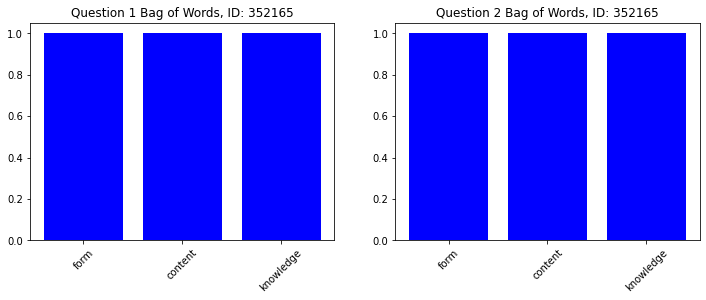

In [138]:
# 1st sample barpots for duplicates
barplot(duplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 352165, 'b')

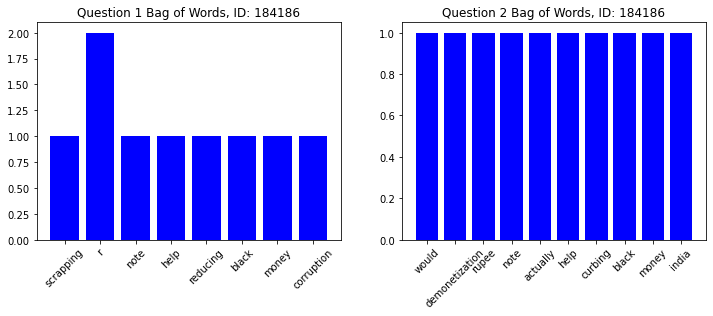

In [139]:
# 2nd sample barpots for duplicates
barplot(duplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 184186, 'b')

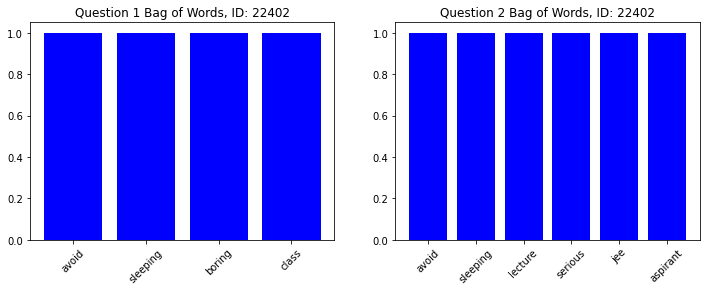

In [140]:
# 3rd sample barpots for duplicates
barplot(duplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 22402, 'b')

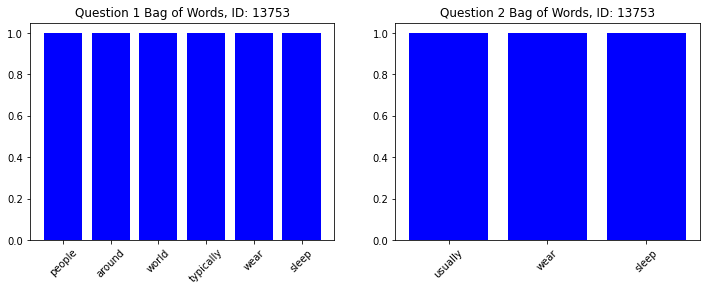

In [141]:
# 4th sample barpots for duplicates
barplot(duplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 13753, 'b')

#### Barplots for samples of non duplicate question pairs

Here, we display barplots of common words for our 4 random sampled nonduplicate question pairs.

In [114]:
# List out the index ids for sampled nonduplicate set
list(nonduplicate_rand.index)

[135482, 337853, 68197, 190781]

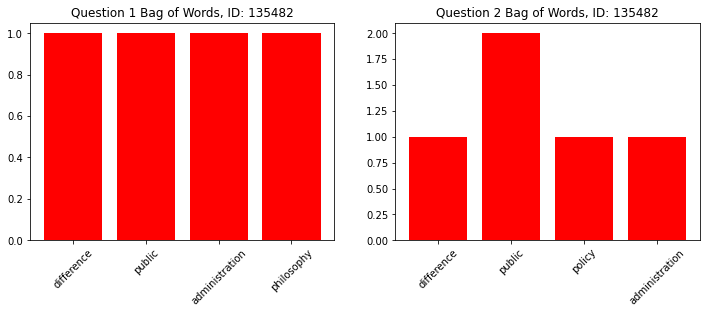

In [142]:
# 1st sample barpots for non duplicate question pairs
barplot(nonduplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 135482, 'r')

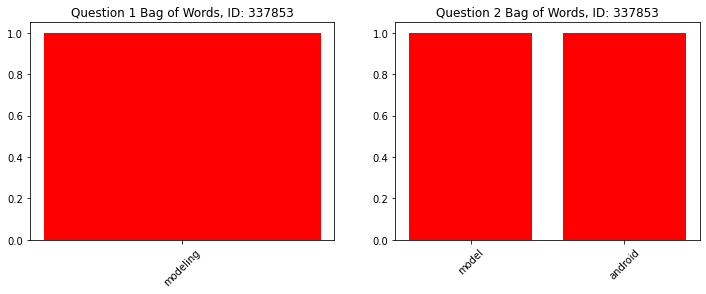

In [143]:
# 2nd sample barpots for non duplicate question pairs
barplot(nonduplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 337853, 'r')

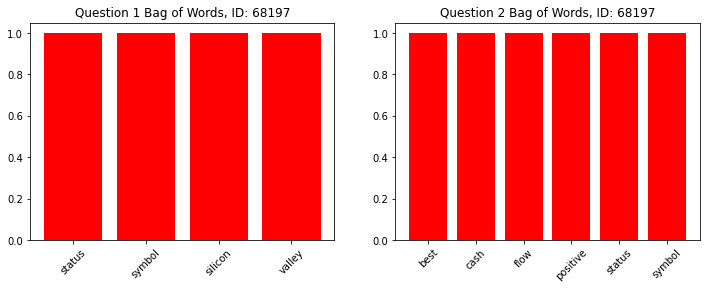

In [144]:
# 3rd sample barpots for non duplicate question pairs
barplot(nonduplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 68197, 'r')

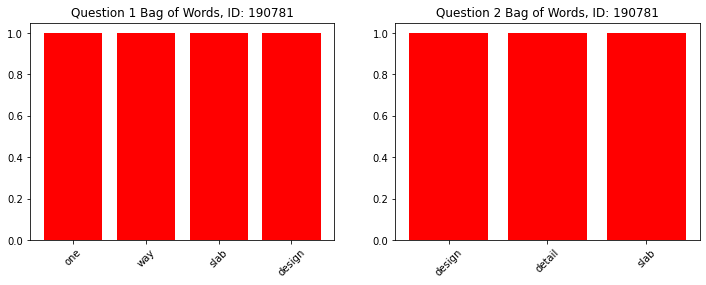

In [145]:
# 4th sample barpots for non duplicate question pairs
barplot(nonduplicate_rand, 'q1_bag_of_words', 'q2_bag_of_words', 190781, 'r')

#### Thoughts

The purpose of the barplots was to see if we can identify word entities, nouns, verbs or any key word(s) shared or not shared between pairs of sentences. This way we can distinguish between duplicate and non-duplicate pairs of sentences. Unfortunately, since each sentence pair is unique, there is never a one-stop rule. 

For instance, if we look at the barplots for the 4th samples (both duplicate and non-duplicate), one question bag of words is a subset of the other in both cases. But pair is in the duplicate partition and one group is in the non duplicate partition. 

Still, we were able to clean and process our data and we will be ready to employ advanced NLP techniques to better predict semantic pariring. 